In [ ]:
import numpy as np #linear algebra
#library which deals with the missing value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imported for cross validation purposes
from sklearn.model_selection import GridSearchCV
#imported for linear regression
from sklearn import linear_model
#to evaluate the performance of the models
from sklearn.metrics import make_scorer

#support vector machine, this is a regression problem and it is used to perform a regression
from sklearn import svm
import pandas as pd #data processing
import matplotlib.pyplot as plt #graph plotting
from sklearn.linear_model import LinearRegression

from sklearn import neighbors #this is another regression model
from math import sqrt #to perform square root operations

In [ ]:
# read data
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/My Drive/Big_Data_Lab/measures_v2.csv', usecols = [0,1,2,3,4,5,6,7,8,9,10,11])
df.head(10)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


In [ ]:
#transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
u_q,1330816.0,54.279005,44.173234,-25.290930,12.069925,48.938181,90.034393,133.036994
coolant,1330816.0,36.229995,21.786149,10.623751,18.698135,26.900141,49.857487,101.598512
stator_winding,1330816.0,66.342745,28.672061,18.585815,42.787957,65.110129,88.141137,141.362885
u_d,1330816.0,-25.133809,63.091972,-131.530411,-78.690904,-7.429755,1.470271,131.469788
stator_tooth,1330816.0,56.878582,22.952233,18.133976,38.416012,56.036345,75.586682,111.946423
motor_speed,1330816.0,2202.080728,1859.663350,-275.549144,317.110665,1999.976685,3760.639058,6000.015137
i_d,1330816.0,-68.716810,64.933233,-278.003632,-115.406060,-51.093763,-2.979688,0.051897
i_q,1330816.0,37.412782,92.181880,-293.426793,1.095863,15.774007,100.612150,301.707855
pm,1330816.0,58.506776,19.001498,20.856956,43.151582,60.266287,72.008371,113.606628
stator_yoke,1330816.0,48.187965,19.991004,18.076689,31.990333,45.625509,61.460828,101.147964


In [ ]:
#to check for null values because if it exists, it will create an unaccurate regression model
df.isnull().values.any()

False

In [ ]:
nans=pd.isnull(df).sum()
nans[nans>0]

Series([], dtype: int64)

In [ ]:
df.dtypes.value_counts() #count 

float64    12
dtype: int64

In [ ]:
df.corr()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118


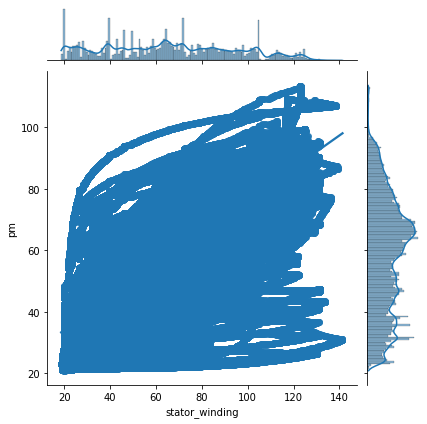

In [ ]:
#to plot graphs
import seaborn as sns 
sns.jointplot(x='stator_winding', y='pm', data=df, kind='reg')

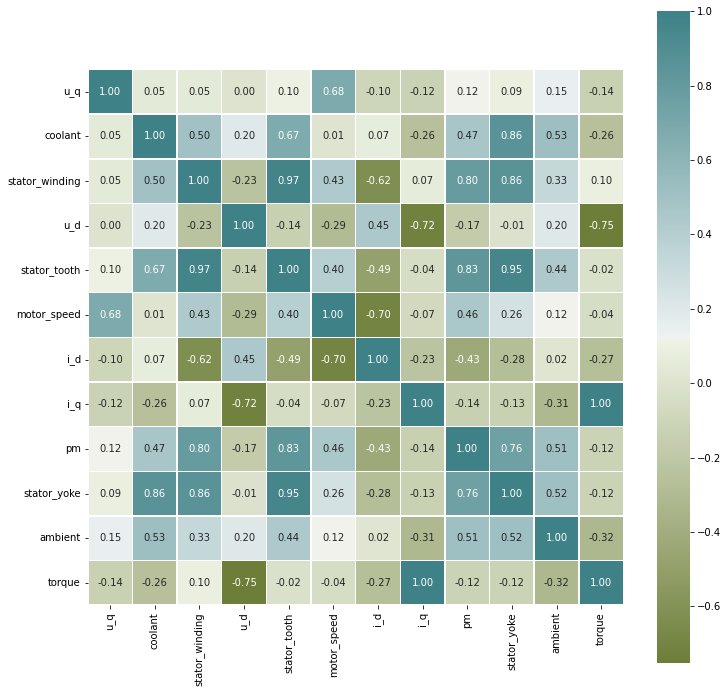

In [ ]:
#to get out the correlation from the features
f, ax=plt.subplots(figsize=(12,12))
corr=df.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', mask= np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(100,200, as_cmap=True), square=True, ax=ax)

plt.show()

In [ ]:
#to estimate different statistical models and conduct statistical test as well as data
import statsmodels.api as sm
#Defining dependet and independent variable
X = df['stator_winding']
X=sm.add_constant(X)

y = df['pm']

#ordinary least squares. it is used to check inconsistent and different values
lm=sm.OLS(y,X)
model=lm.fit()

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 2.300e+06
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:40:40   Log-Likelihood:            -5.1391e+06
No. Observations:             1330816   AIC:                         1.028e+07
Df Residuals:                 1330814   BIC:                         1.028e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.5141      0.025    935.428      0.000      23.465      23.563
stator_winding     0.5275      0.000   1516.504      0.000       0.527       0.528
==============================================================================
Omnibus:                    99709.506   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           254026.525
Skew:                          -0.445   Prob(JB):                         0.00
Kurtosis:                       4.947   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

const             23.514130
stator_winding     0.527452
dtype: float64

In [ ]:
model.mse_model #mean squared error is too much. It is not good.

304370245.0472444

In [ ]:
model.rsquared #Not bad

0.6334448930776385

In [ ]:
model.rsquared_adj #Not bad

0.6334446176408706

In [ ]:
model.fittedvalues[0:5] #Predicted values

0    33.581441
1    33.584458
2    33.582871
3    33.579522
4    33.579255
dtype: float64

In [ ]:
y[0:5] #Real values

0    24.554214
1    24.538078
2    24.544693
3    24.554018
4    24.565397
Name: pm, dtype: float64

In [ ]:
#Model equation -> y = mx + c
print("pm = " + 
      str("%.3f" % model.params[0]) + ' + stator_winding' + "*" + 
      str("%.3f" % model.params[1]))

pm = 23.514 + i_d*0.527


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


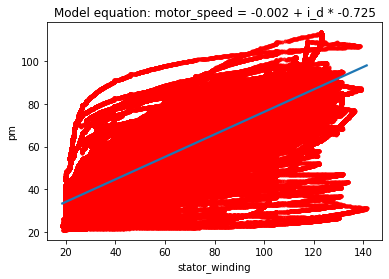

In [ ]:
#Model Visualization 
g=sns.regplot(df['stator_winding'] , df['pm'], 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_title('Model equation: pm = -0.002 + stator_winding * -0.725')
g.set_ylabel('pm')
g.set_xlabel('stator_winding');

In [ ]:
#performance matrix, it is used in regression to predict a number
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y, model.fittedvalues)
rmse=np.sqrt(mse)
rmse

11.50422343193371

In [ ]:
k_t=pd.DataFrame({'Real_values':y[0:50], 
                  'Predicted_values' :model.fittedvalues[0:50]})
k_t['error']=k_t['Real_values']-k_t['Predicted_values']
k_t.head()

,Real_values,Predicted_values,error
0,24.554214,33.581441,-9.027227
1,24.538078,33.584458,-9.046380
2,24.544693,33.582871,-9.038178
3,24.554018,33.579522,-9.025504
4,24.565397,33.579255,-9.013858


In [ ]:
#moving to multiple linear regression where all the independent values are in x while the dependent value is in y
X=df.drop("pm", axis=1)
#drop the main dependent value
y=df["pm"]

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

training=df.copy()

In [ ]:
lm=sm.OLS(y_train, X_train)

model=lm.fit()
model.summary() #All coefficients are significant for the model by looking at the p-value. ( P>|t| )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     pm   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          6.698e+06
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        01:41:22   Log-Likelihood:                     -3.6329e+06
No. Observations:             1064652   AIC:                                  7.266e+06
Df Residuals:                 1064641   BIC:                                  7.266e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
u_q               -0.1302      0.000   -349.196      0.000      -0.131      -0.129
coolant           -0.1728      0.002    -77.707      0.000      -0.177      -0.168
stator_winding    -1.7088      0.003   -489.677      0.000      -1.716      -1.702
u_d               -0.0190      0.000    -77.030      0.000      -0.020      -0.019
stator_tooth       4.1713      0.009    484.799      0.000       4.154       4.188
motor_speed        0.0028   1.49e-05    185.992      0.000       0.003       0.003
i_d                0.0382      0.000    108.094      0.000       0.037       0.039
i_q               -0.0068      0.001     -5.475      0.000      -0.009      -0.004
stator_yoke       -1.6443      0.008   -212.770      0.000      -1.659      -1.629
ambient            0.9625      0.001    979.072      0.000       0.961       0.964
torque            -0.0028      0.002     -1.765      0.078      -0.006       0.000
==============================================================================
Omnibus:                    99900.340   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290410.683
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                       5.345   Cond. No.                     4.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Root Mean Squared Error for Train
#y train's predicted values are x-train
rmse1=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse1

7.339923198903453

In [ ]:
#Root Mean Squared Error for Test
rmse2=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse2

7.352448782986941

In [ ]:
#Model Tuning for Multiple Linear Regression
model = LinearRegression().fit(X_train,y_train)
cross_val_score1=cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean() #verified score value for train model
print('Verified R2 value for Training model: ' + str(cross_val_score1))

#cross-validation is done to reduce overfitting. Overfitting leads to misleading performance, resulting in poor accuracy
cross_val_score2=cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean() #verified score value for test model
print('Verified R2 value for Testing Model: ' + str(cross_val_score2))

Verified R2 value for Training model: 0.8550306666710871
Verified R2 value for Testing Model: 0.8545525822861164


In [ ]:
#RMSE is used for here for linear regression model
RMSE1=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for train model
print('Verified RMSE value for Training model: ' + str(RMSE1))

RMSE2=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, 
                               scoring='neg_mean_squared_error')).mean() #verified RMSE score value for test model
print('Verified RMSE value for Testing Model: ' + str(RMSE2))

Verified RMSE value for Training model: 7.234253963168416
Verified RMSE value for Testing Model: 7.248181904900744


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


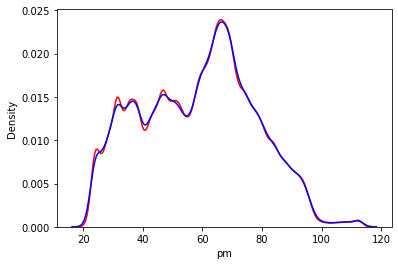

In [ ]:
#Visualizing for Multiple Linear Regression y values
#plotted the actual graph and predicted to see the difference between the RMSE scores

import seaborn as sns
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values" , ax=ax1);

In [ ]:
from sklearn.model_selection import GridSearchCV #hyperparamter tuning
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
knn_model=KNeighborsRegressor().fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

In [ ]:
y_pred.shape

(266164,)

In [ ]:
#Model Tuning (learning best n_neighbors hyperparameter)
knn_params={'n_neighbors' : np.arange(1,5,1)}

knn=KNeighborsRegressor()
knn_cv_model=GridSearchCV(knn, knn_params, cv=5)

#cross validation with grid search. check all possible combinations. fivefold cross validation is being done in grid search.

knn_cv_model.fit(X_train,y_train)
knn_cv_model.best_params_["n_neighbors"]

4

In [ ]:
# Train error values from n=1 up n=2
RMSE=[]
RMSE_CV=[]
for k in range(2):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred=knn_model.predict(X_train)
    rmse=np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv=np.sqrt(-1*cross_val_score(knn_model,X_train,y_train,cv=2,
                                       scoring='neg_mean_squared_error').mean())

    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)

    print("RMSE value: ", rmse, 'for k= ',k,
          "RMSE values with applying Cross Validation: ", rmse_cv)

RMSE value:  0.0 for k=  1 RMSE values with applying Cross Validation:  4.5704085111158586
RMSE value:  2.063653399759616 for k=  2 RMSE values with applying Cross Validation:  4.17425441394992


In [ ]:
#Model Tuning according to best parametre for KNN Regression
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

3.709885748166492

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X_train)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y_train, random_state = 0)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print('Polynomial Linear Regression:' ,plr.score(X_test,y_test))

Polynomial Linear Regression: 0.8977739345776371


Coefficients: 
 [-1.11492341e-10 -3.77094574e-01  3.39210524e-01 -9.81757977e+00
 -1.20783995e+00  1.99478709e+01  2.54025012e-02 -6.40899490e-01
  1.82075241e-01 -8.93585680e+00 -4.96721776e+00 -2.25190235e-01
 -2.16225813e-03  3.56080525e-03  3.54986237e-03  1.79841112e-03
  1.01365937e-03  1.42332711e-04  4.30576405e-03 -1.14920770e-02
 -4.39429573e-03 -2.59152638e-02  3.34106388e-03  3.57688562e-03
 -1.61779644e-02  2.40355977e-03  6.16339988e-02 -9.55279031e-05
 -1.52710894e-03 -6.88083856e-03 -3.38597082e-02 -7.67166754e-02
  9.96341747e-03  6.52941399e-02 -1.46915857e-03 -3.06182485e-01
 -7.09620102e-06 -4.51317549e-03 -7.67311964e-04  1.97535185e-01
  2.94700553e-01  9.62266288e-04 -2.12892280e-04  3.48095075e-03
 -2.05148698e-06 -6.97757239e-03 -5.55686550e-03 -3.72909526e-03
  5.16674059e-03  5.56247830e-03  3.82436861e-01 -2.04631906e-04
  4.61175741e-03  8.65714245e-04 -5.02515869e-01 -6.75772762e-01
 -4.92212720e-04 -1.42395564e-06  9.96585674e-05  1.84432664e-04
  2.15506

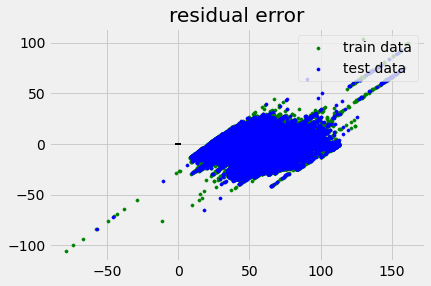

In [ ]:
#Plotting Residual in Linear Regression 

from sklearn import linear_model,metrics
#Create linear regression object
reg=linear_model.LinearRegression()

#train the model using the train data sets
reg.fit(X_train,y_train)

#regression coefficients
print("Coefficients: \n", reg.coef_)

#Variance score
print("Variance score: {}".format(reg.score(X_test,y_test)))

plt.style.use('fivethirtyeight')

#plotting residual errors in training data
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train, 
            color="green", s=10, label="train data")

#plotting residual errors in test data
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test, 
            color="blue", s=10, label="test data")

#plot line for zero residual error
plt.hlines(y=0,xmin=-2, xmax=2, linewidth=2)

#plot legend
plt.legend(loc='upper right')

#plot title
plt.title("residual error")

plt.show()